In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

# Set pandas option to avoid silent downcasting warning
pd.set_option('future.no_silent_downcasting', True)

# Load the data from the Excel fille
thyroid_data = pd.read_excel("Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
thyroid_data.replace('?', np.nan, inplace=True)

# Select numerical columns
numeric_cols_thyroid = thyroid_data.select_dtypes(include=['int64']).columns

# Impute missing values in numerical columns
for col in numeric_cols_thyroid:
    if thyroid_data[col].isnull().sum() > 0:
        if thyroid_data[col].skew() < 1:
            thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].mean())
            print("Column: {}, Imputation Method: Mean".format(col))
        else:
            thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].median())
            print("Column: {}, Imputation Method: Median".format(col))

# Select categorical columns
categorical_cols_thyroid = thyroid_data.select_dtypes(include=['object']).columns

# Impute missing values in categorical columns
for col in categorical_cols_thyroid:
    if thyroid_data[col].isnull().sum() > 0:
        thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].mode()[0])
        print("Column: {}, USED: Mode".format(col))


Column: sex, USED: Mode
Column: TSH, USED: Mode
Column: T3, USED: Mode
Column: TT4, USED: Mode
Column: T4U, USED: Mode
Column: FTI, USED: Mode
Column: TBG, USED: Mode


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load data from Excel sheet
thyroid_data = pd.read_excel("Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')

# Identify numeric columns
numeric_cols_thyroid = thyroid_data.select_dtypes(include=['int64']).columns

# Display descriptive statistics for numeric columns
print(thyroid_data[numeric_cols_thyroid].describe())

# Standardize the 'age' column
scaler = StandardScaler()
thyroid_data['age'] = scaler.fit_transform(thyroid_data[['age']])

print("Z-score Normalized 'age' Column:")
print(thyroid_data['age'])


          Record ID           age
count  9.172000e+03   9172.000000
mean   8.529473e+08     73.555822
std    7.581969e+06   1183.976718
min    8.408010e+08      1.000000
25%    8.504090e+08     37.000000
50%    8.510040e+08     55.000000
75%    8.607110e+08     68.000000
max    8.701190e+08  65526.000000
Z-score Normalized 'age' Column:
0      -0.037634
1      -0.037634
2      -0.027499
3      -0.031722
4      -0.035100
          ...   
9167   -0.014829
9168   -0.043547
9169   -0.003848
9170   -0.022431
9171   -0.035945
Name: age, Length: 9172, dtype: float64


In [13]:
import pandas as pd
import numpy as np

# Set pandas option to avoid silent downcasting warning
pd.set_option('mode.chained_assignment', None)  # Suppresses SettingWithCopyWarning

# Load and preprocess data from 'thyroid0387_UCI' sheet
thyroid_data = pd.read_excel("Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
thyroid_data.replace('?', np.nan, inplace=True)
print("For thyroid data sheet")

# Identify binary columns in thyroid data
binary_cols_thyroid = [col for col in thyroid_data.columns if set(thyroid_data[col].dropna().unique()) <= {'t', 'f'}]
binary_cols_thyroid += [col for col in thyroid_data.columns if set(thyroid_data[col].dropna().unique()) <= {'M', 'F'}]

# Replace binary values with 0 and 1
thyroid_data[binary_cols_thyroid] = thyroid_data[binary_cols_thyroid].replace({'t': 1, 'f': 0, 'M': 1, 'F': 0})

# Calculate Jaccard and Simple Matching Coefficient for thyroid data
vector1_thyroid = thyroid_data.loc[0, binary_cols_thyroid].astype(int)
vector2_thyroid = thyroid_data.loc[1, binary_cols_thyroid].astype(int)

f11_thyroid = np.sum((vector1_thyroid == 1) & (vector2_thyroid == 1))
f00_thyroid = np.sum((vector1_thyroid == 0) & (vector2_thyroid == 0))
f10_thyroid = np.sum((vector1_thyroid == 1) & (vector2_thyroid == 0))
f01_thyroid = np.sum((vector1_thyroid == 0) & (vector2_thyroid == 1))

jc_thyroid = f11_thyroid / (f01_thyroid + f10_thyroid + f11_thyroid)
smc_thyroid = (f11_thyroid + f00_thyroid) / (f00_thyroid + f01_thyroid + f10_thyroid + f11_thyroid)

print("Jaccard Coefficient (JC) for thyroid data sheet:", jc_thyroid)
print("Simple Matching Coefficient (SMC) for thyroid data sheet:", smc_thyroid)

# Load and preprocess data from 'marketing_campaign' sheet
marketing_data = pd.read_excel("Lab Session Data.xlsx", sheet_name='marketing_campaign')
marketing_data.replace('?', np.nan, inplace=True)
print("For marketing data sheet")

# Identify binary columns in marketing data
binary_cols_marketing = [col for col in marketing_data.columns if set(marketing_data[col].dropna().unique()) <= {0, 1}]

# Calculate Jaccard and Simple Matching Coefficient for marketing data
marketing_data[binary_cols_marketing] = marketing_data[binary_cols_marketing]

vector1_marketing = marketing_data.loc[0, binary_cols_marketing].astype(int)
vector2_marketing = marketing_data.loc[1, binary_cols_marketing].astype(int)

f11_marketing = np.sum((vector1_marketing == 1) & (vector2_marketing == 1))
f00_marketing = np.sum((vector1_marketing == 0) & (vector2_marketing == 0))
f10_marketing = np.sum((vector1_marketing == 1) & (vector2_marketing == 0))
f01_marketing = np.sum((vector1_marketing == 0) & (vector2_marketing == 1))

jc_marketing = f11_marketing / (f01_marketing + f10_marketing + f11_marketing)
smc_marketing = (f11_marketing + f00_marketing) / (f00_marketing + f01_marketing + f10_marketing + f11_marketing)

print("Jaccard Coefficient (JC) for marketing data sheet:", jc_marketing)
print("Simple Matching Coefficient (SMC) for marketing data sheet:", smc_marketing)


For thyroid data sheet
Jaccard Coefficient (JC) for thyroid data sheet: 0.25
Simple Matching Coefficient (SMC) for thyroid data sheet: 0.8571428571428571
For marketing data sheet
Jaccard Coefficient (JC) for marketing data sheet: 0.0
Simple Matching Coefficient (SMC) for marketing data sheet: 0.8571428571428571


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Load and preprocess data from 'thyroid0387_UCI' sheet
thyroid_data = pd.read_excel("Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
thyroid_data.replace('?', np.nan, inplace=True)

# Initialize label encoders for categorical columns
label_encoders = {}
for col in thyroid_data.select_dtypes(include=['object']).columns:
    if thyroid_data[col].isnull().sum() > 0:
        thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].mode()[0])
    encoder = LabelEncoder()
    thyroid_data[col] = encoder.fit_transform(thyroid_data[col])
    label_encoders[col] = encoder

# Fill missing values in numerical columns with mean
for col in thyroid_data.select_dtypes(include=[np.number]).columns:
    thyroid_data[col] = thyroid_data[col].fillna(thyroid_data[col].mean())

# Compute cosine similarity between the first and second rows
vector1 = thyroid_data.iloc[0].values.reshape(1, -1)
vector2 = thyroid_data.iloc[1].values.reshape(1, -1)

cosine_similarity_value = cosine_similarity(vector1, vector2)[0][0]

print("Cosine Similarity:", cosine_similarity_value)


Cosine Similarity: 0.9999999999999943


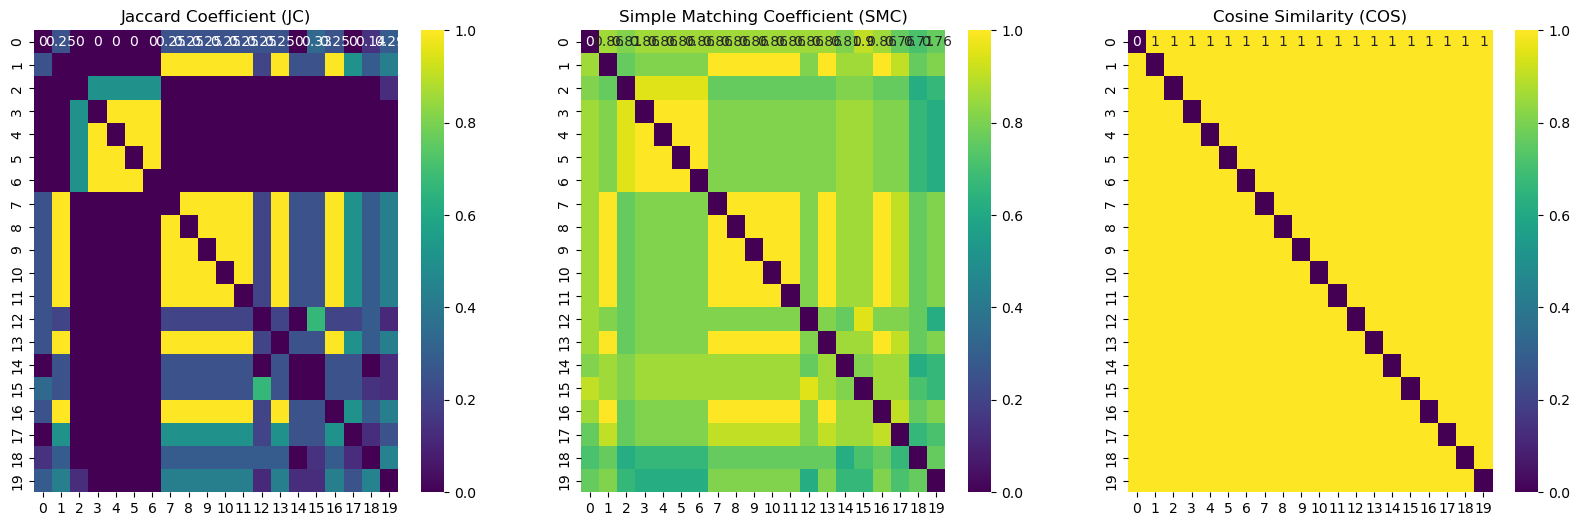

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess data from 'thyroid0387_UCI' sheet
thyroid_data = pd.read_excel("Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
thyroid_data.replace('?', np.nan, inplace=True)

# Identify binary columns
binary_cols_thyroid = [col for col in thyroid_data.columns if set(thyroid_data[col].dropna().unique()) <= {'t', 'f'}]
binary_cols_thyroid += [col for col in thyroid_data.columns if set(thyroid_data[col].dropna().unique()) <= {'M', 'F'}]

# Replace binary values with 0 and 1
thyroid_data[binary_cols_thyroid] = thyroid_data[binary_cols_thyroid].replace({'t': 1, 'f': 0, 'M': 1, 'F': 0})

# Label encode and impute missing values
label_encoders = {}
for column in thyroid_data.select_dtypes(include=['object']).columns:
    if thyroid_data[column].isnull().sum() > 0:
        thyroid_data[column] = thyroid_data[column].fillna(thyroid_data[column].mode()[0])
    encoder = LabelEncoder()
    thyroid_data[column] = encoder.fit_transform(thyroid_data[column])
    label_encoders[column] = encoder

for column in thyroid_data.select_dtypes(include=[np.number]).columns:
    thyroid_data[column] = thyroid_data[column].fillna(thyroid_data[column].mean())

# Create matrices to store similarity measures
subset_thyroid_data = thyroid_data.iloc[:20]
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cosine_matrix = np.zeros((20, 20))

# Calculate similarity measures
for i in range(20):
    for j in range(20):
        if i != j:
            vector1 = subset_thyroid_data.iloc[i, :].values
            vector2 = subset_thyroid_data.iloc[j, :].values

            binary_vector1 = subset_thyroid_data.loc[i, binary_cols_thyroid].astype(int)
            binary_vector2 = subset_thyroid_data.loc[j, binary_cols_thyroid].astype(int)

            f11 = np.sum((binary_vector1 == 1) & (binary_vector2 == 1))
            f00 = np.sum((binary_vector1 == 0) & (binary_vector2 == 0))
            f10 = np.sum((binary_vector1 == 1) & (binary_vector2 == 0))
            f01 = np.sum((binary_vector1 == 0) & (binary_vector2 == 1))

            jc_matrix[i, j] = f11 / (f01 + f10 + f11)
            smc_matrix[i, j] = (f11 + f00) / (f00 + f01 + f10 + f11)

            vector1_all = vector1.reshape(1, -1)
            vector2_all = vector2.reshape(1, -1)
            cosine_matrix[i, j] = cosine_similarity(vector1_all, vector2_all)[0][0]

# Plot the heatmaps
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(jc_matrix, annot=True, cmap='viridis', ax=axs[0])
axs[0].set_title('Jaccard Coefficient (JC)')

sns.heatmap(smc_matrix, annot=True, cmap='viridis', ax=axs[1])
axs[1].set_title('Simple Matching Coefficient (SMC)')

sns.heatmap(cosine_matrix, annot=True, cmap='viridis', ax=axs[2])
axs[2].set_title('Cosine Similarity (COS)')

plt.show()
